# **Rescale number of frames** -> skip evenly distributed number of frames

+ **to do: do the same with timestamp vector and plot it**

In [2]:
import os 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import matplotlib.dates as mdates

import sys
sys.path.append(os.path.join(os.getcwd(),"vpp"))

from utils import mvm2txt

# Save normalized movement to txt file from csv

In [ ]:
csv_01 = "/media/data-119/rat596_20210701_184333/acA1300-60gmNIR__21471690__20210701_184333372.csv"
mvm2txt(csv_01, rat=1)

### Go to folder data-119

In [15]:
os.chdir("/media/data-119")

In [16]:
os.listdir()

['Rat674-20211214_2',
 'rat596_20210705_183011',
 'rat596_20210704_193426',
 'rat596_20210702_175129',
 'nextcloud',
 '.Trash-1010',
 'rat596_20210703_192113',
 'rat_602_20210701_184333',
 'rat596_20210701_184333',
 'Rat628-20210714',
 'lost+found',
 'Rat628-20210715_16']

## **July 01**

+ notes: 
    + use normalized movement
    + there are weird peaks -> what is it? how to remove it?

### Read ephys timestamp and mvm data, convert ephys to seonds

In [27]:
#path to SYNC_file & mvm file
ephys_time_path="/media/data-119/rat596_20210701_184333/rat596_20210701_184333tmstp.txt"
mvm_path="/media/data-119/rat596_20210701_184333/rat596_20210701_184333mvm.txt"


#read SYNC_file
e_test = open(ephys_time_path,"r")
ephys_time_test = [[float(x) for x in line.split()] for line in e_test]
e_test.close()

#read mvm_file
m_test = open(mvm_path,"r")
mvm_test = [[float(x) for x in line.split()] for line in m_test]
m_test.close()

#concatenate the list of lists into one list (array)
ephys_time_test = np.concatenate(ephys_time_test)
mvm_test = np.concatenate(mvm_test)

#convert ephys to seconds 
ephys_time_test_sec = [i/2500 for i in ephys_time_test]

In [18]:
len(mvm_test)/len(ephys_time_test_sec)

1.0011209813716409

### Calculate index of lags, number of points between lags

+ it's every 38.5th frame
+ always ~ 0.4 ms = 0.0004 s

+ remove one frame when the lags add up to 40 ms = 0.04 s

-> multiply by factor 100 => 3850

In [34]:
#get the difference between frame in milliseconds
ephys_time_test_sec_diff=np.diff(ephys_time_test_sec)
print("Sum of differences: {}".format(np.sum(ephys_time_test_sec_diff)))

#get index lags.. time tn-t0
differences_sec=[]
differences_sec_2sum = []
for i in range(len(ephys_time_test_sec_diff)):
    
    #if the diffed time is not exactly 40 ms
    if ephys_time_test_sec_diff[i]-0.04 != 0:
        #can be negative or positive difference
        differences_sec.append((i,ephys_time_test_sec_diff[i]-0.04))
        differences_sec_2sum.append(ephys_time_test_sec_diff[i]-0.04)

#sum of differences bigger than standard frame duration (!=0.040ms)
print("irregular diffs add up to: {}".format(np.sum(differences_sec_2sum)))

#big differences -> from differences select diff of absolute value bigger than 0.0001ms
big_differences_sec=[]
for i in range(len(differences_sec)):
    
    #append tuple if np.abs(difference) > 0.0001
    if np.abs(differences_sec[i][1]) > 0.0001:
        big_differences_sec.append(differences_sec[i])
        
#get the indexes only of big diffs
big_differences_sec_indexes=[big_differences_sec[i][0] for i in range(len(big_differences_sec))]

#np diff of indexes -> after how many frames the difference occur
big_differences_sec_indexes_DIFFS=np.diff(big_differences_sec_indexes)

#time 
print(np.mean(big_differences_sec_indexes_DIFFS))

Sum of differences: 53477.4808
irregular diffs add up to: 60.04079999999808
38.13536282377131


### How many frames are to be deleted?

In [29]:
len(mvm_test)/3813.5

350.5792578995673

In [30]:
len(mvm_test)-len(ephys_time_test_sec)

1497

## **July 02**


### Read ephys timestamp, video duration and mvm data, convert ephys to seonds

In [20]:
#path to SYNC_file & mvm file
ephys_time_path="/media/data-119/rat596_20210702_175129/rat596_20210702_175129tmstp.txt"
mvm_path="/media/data-119/rat596_20210702_175129/rat596_20210702_175129mvm.txt"
duration_path = "/media/data-119/rat596_20210702_175129/rat596_20210702_175129duration.txt"

#read SYNC_file
e_test = open(ephys_time_path,"r")
ephys_time_test = [[float(x) for x in line.split()] for line in e_test]
e_test.close()

#read mvm_file
m_test = open(mvm_path,"r")
mvm_test = [[float(x) for x in line.split()] for line in m_test]
m_test.close()

#read duration file (it's in secs)
d_test = open(duration_path,"r")
duration_test = [[float(x) for x in line.split()] for line in d_test]
d_test.close()

#concatenate the list of lists into one list (array)
ephys_time_test = np.concatenate(ephys_time_test)
mvm_test = np.concatenate(mvm_test)
duration_test = np.concatenate(duration_test)

#convert ephys to seconds (divide by sampling freq)
ephys_time_test_sec = [i/2500 for i in ephys_time_test]

In [21]:
len(mvm_test)/len(ephys_time_test_sec)

1.0002779308225282

### Calculate index of lags, number of points between lags

+ it's every 38.5th frame
+ always ~ 0.4 ms = 0.0004 s

+ remove one frame when the lags add up to 40 ms = 0.04 s

-> multiply by factor 100 => 3850

In [22]:
#get the difference between frame in milliseconds
ephys_time_test_sec_diff=np.diff(ephys_time_test_sec)
print("SUm of differences: {}".format(np.sum(ephys_time_test_sec_diff)))


#get index lags.. time tn-t0
differences_sec=[]
for i in range(len(ephys_time_test_sec_diff)):
    
    #if the diffed time is not exactly 40 ms
    if ephys_time_test_sec_diff[i]-0.04 != 0:
        #can be negative or positive difference
        differences_sec.append((i,ephys_time_test_sec_diff[i]-0.04))
        
#big differences -> from differences select diff of absolute value bigger than 0.0001ms
big_differences_sec=[]
for i in range(len(differences_sec)):
    
    #append tuple if np.abs(difference) > 0.0001
    if np.abs(differences_sec[i][1]) > 0.0001:
        big_differences_sec.append(differences_sec[i])
        
#get the indexes only of big diffs
big_differences_sec_indexes=[big_differences_sec[i][0] for i in range(len(big_differences_sec))]

#np diff of indexes -> after how many frames the difference occur
big_differences_sec_indexes_DIFFS=np.diff(big_differences_sec_indexes)

SUm of differences: 57152.475999999995


### How many frames are to be deleted?

In [22]:
len(mvm_test)/3850

371.11948051948053

In [15]:
len(mvm_test)-len(ephys_time_test_sec)

397

### it doesn't come ONLY  from the big differences.. let's just delete exact num of frames here... spaced evenly

In [10]:
#number of frames in mvm divided by the difference
skip_rate = int(len(mvm_test)/(len(mvm_test)-len(ephys_time_test_sec)))
print(skip_rate)

3599


In [11]:
#create copy from which we delete items
import copy
mvm_test_copy=copy.deepcopy(mvm_test)
duration_test_copy = copy.deepcopy(duration_test)

In [12]:
mvm_test_copy=[mvm_test[i] for i in range(len(mvm_test)) if (i==0) | (i%skip_rate != 0)]
duration_test_copy=[duration_test[i] for i in range(len(duration_test)) if (i==0) | (i%skip_rate != 0)]

indexes2delete=[]
for i in range(len(mvm_test)):
    if i == 0:
        continue
    if i%skip_rate == 0:
        del mvm_test_copy[i]

In [14]:
#len(indexes2delete) #good number
print([len(mvm_test),len(ephys_time_test)])
print(len(mvm_test_copy))

[1428810, 1428413]
1428413


mvm_test_copy = list(mvm_test_copy)
del mvm_test_copy[indexes2delete]

In [16]:
len(mvm_test_copy)-len(ephys_time_test_sec)

0

### Save rescaled mvm and duration into te same folder

In [17]:
np.savetxt("/media/data-119/rat596_20210702_175129/rat596_20210702_175129mvm_rescaled.txt",
              mvm_test_copy)

In [18]:
np.savetxt("/media/data-119/rat596_20210702_175129/rat596_20210702_175129duration_rescaled.txt",
              duration_test_copy)

## Plot rescaled mvm against duration / ephys time

In [19]:
#starts at 
ephys_time_test_sec[0]

2.872

In [56]:
def plot_mvm_rescaled(duration_test_copy, mvm_test_copy, f=25, plot_all = False,
                     start={"hours": 2, "minutes": 0, "seconds": 0},
                     dt={"hours": 1, "minutes": 0, "seconds": 0},
                     ylim=1):
    '''plot all duration + mvm or only a section'''
    
    #if you want to plot only a part 
    if not plot_all:
        # determine frames per sec number
        #f = 1000 / (float(df["millisec"][1]) - float(df["millisec"][0]))
        f = 25

        # start and end coordinates depending on duration
        # calculate indexes
        h0 = start["hours"]
        m0 = start["minutes"]
        s0 = start["seconds"]
        h1 = start["hours"] + dt["hours"]
        m1 = start["minutes"] + dt["minutes"]
        s1 = start["seconds"] + dt["seconds"]

        start_st = int((f * h0 * 60 * 60) + (f * m0 * 60) + (f * s0))
        end_st = int((f * h1 * 60 * 60) + (f * m1 * 60) + (f * s1))

    #otherwise plot all (from index 0 to index -1)
    else:
        start_st = 0
        end_st = -1

    #convert duration to timedelta
    duration_secs_rescaled = [timedelta(seconds=float(i)) for i in duration_test_copy]

    #change to df
    duration_secs_rescaled = pd.DataFrame(duration_secs_rescaled, columns=['duration'])

    # to keep only the time of the timedelta (otherwise give you estimate with days as well)
    duration_secs_rescaled['duration'] = duration_secs_rescaled['duration'].values.astype('datetime64[ns]')

    duration_secs_rescaled = [i.strftime("%H:%M:%S.%f")[:-3] for i in duration_secs_rescaled['duration']]


    #change to datetime object
    duration_secs_rescaled = pd.to_datetime(duration_secs_rescaled)

    fig, (ax1) = plt.subplots(1,1, figsize=(16, 8))
    ax1.plot(duration_secs_rescaled[start_st:end_st],
             mvm_test_copy[start_st:end_st],
             label="rat_1")
    ##to comment: Cntl + /
    # ax2.plot(df.index[start_st:end_st],
    #          df["mvmr2_normalized"][start_st:end_st],
    #          label="rat_2")
    for ax in [ax1]:
        ax.set_ylim((0, ylim))
        ax.set_title("movement (pixel change)", fontsize=20)
        ax.set_xlabel("time", fontsize=16)
        ax.set_ylabel("sum of pixel change", fontsize=16)
        ax.tick_params(axis='x', labelrotation=60, labelsize=14)
        #ax.xaxis.set_major_locator(mdates.DateFormatter('%Y-%b-%%H-%M'))
        ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
        #ax.xaxis.set_major_locator(plt.AutoLocator())
        ax.legend()
        
    plt.hlines(y = [np.mean(mvm_test_copy), np.std(mvm_test_copy), np.median(mvm_test_copy)], 
               xmin = duration_secs_rescaled[start_st], 
               xmax= duration_secs_rescaled[end_st],
               colors =['red','purple', 'green'], label=['mean', 'sd', 'median'])
    plt.show()

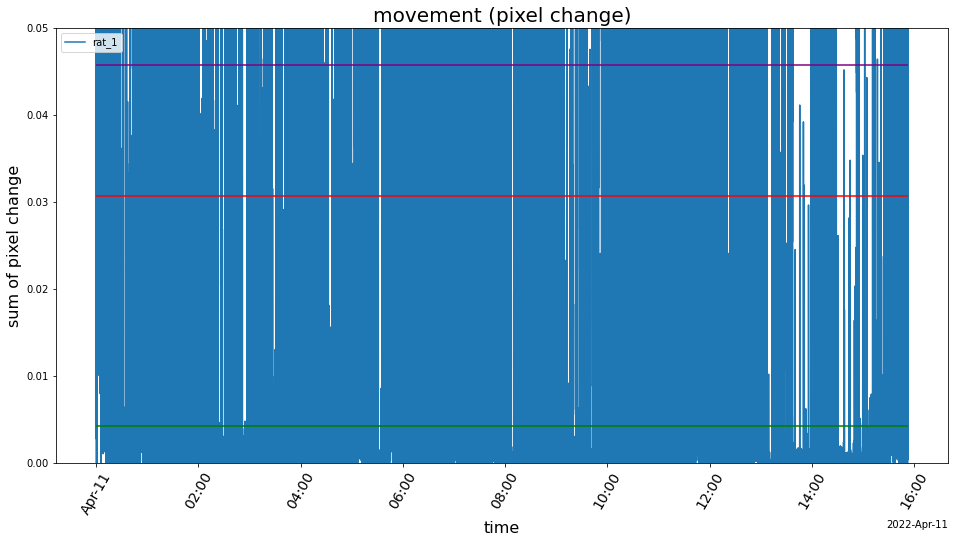

In [58]:
plot_mvm_rescaled(duration_test_copy, mvm_test_copy, f=25, plot_all = True,
                     start={"hours": 2, "minutes": 0, "seconds": 0},
                     dt={"hours": 1, "minutes": 0, "seconds": 0},
                     ylim=0.05)

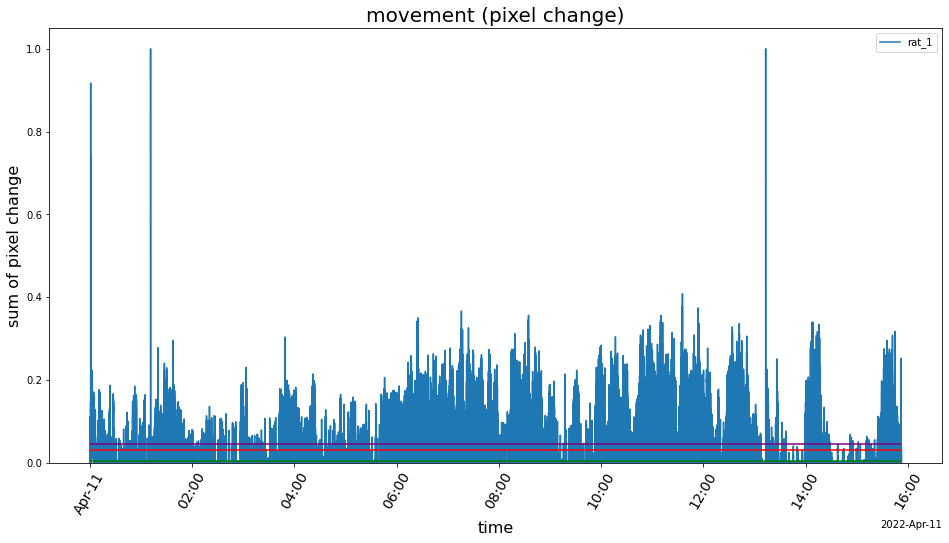

In [59]:
plot_mvm_rescaled(duration_test_copy, mvm_test_copy, f=25, plot_all = True,
                     start={"hours": 2, "minutes": 0, "seconds": 0},
                     dt={"hours": 1, "minutes": 0, "seconds": 0},
                     ylim=1.05)

                duration
0        0 days 00:00:00
1 0 days 00:00:00.040000
2 0 days 00:00:00.080000
3 0 days 00:00:00.120000
4 0 days 00:00:00.160000


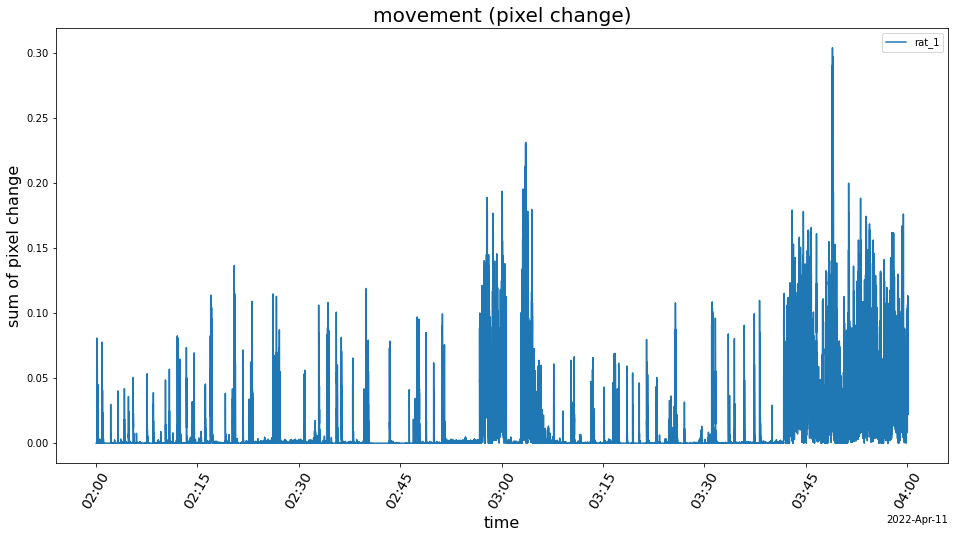

In [39]:
plot_mvm_rescaled(duration_test_copy, mvm_test_copy, f=25, plot_all = False,
                     start={"hours": 2, "minutes": 0, "seconds": 0},
                     dt={"hours": 2, "minutes": 0, "seconds": 0},
                     ylim=1)

                duration
0        0 days 00:00:00
1 0 days 00:00:00.040000
2 0 days 00:00:00.080000
3 0 days 00:00:00.120000
4 0 days 00:00:00.160000


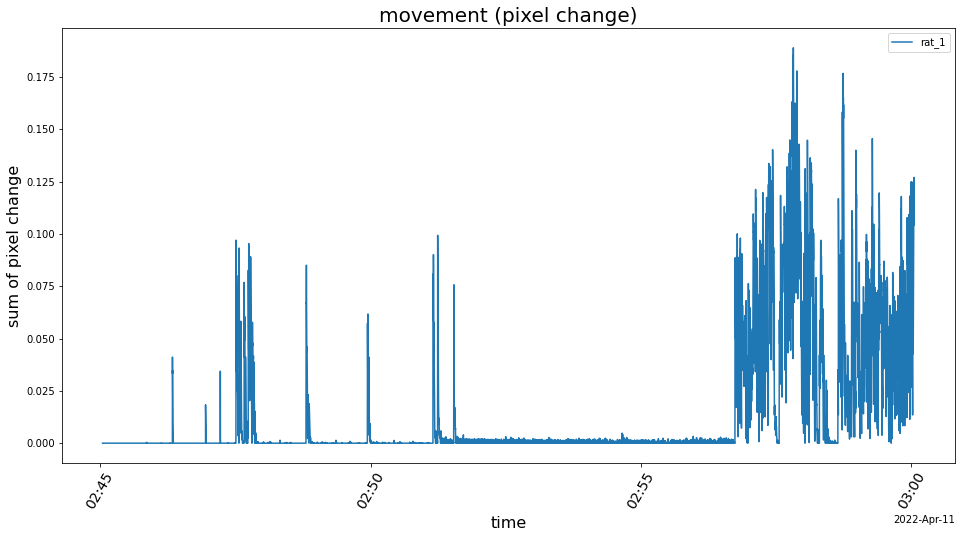

In [40]:
plot_mvm_rescaled(duration_test_copy, mvm_test_copy, f=25, plot_all = False,
                     start={"hours": 2, "minutes": 45, "seconds": 0},
                     dt={"hours": 0, "minutes": 15, "seconds": 0},
                     ylim=1)

                duration
0        0 days 00:00:00
1 0 days 00:00:00.040000
2 0 days 00:00:00.080000
3 0 days 00:00:00.120000
4 0 days 00:00:00.160000


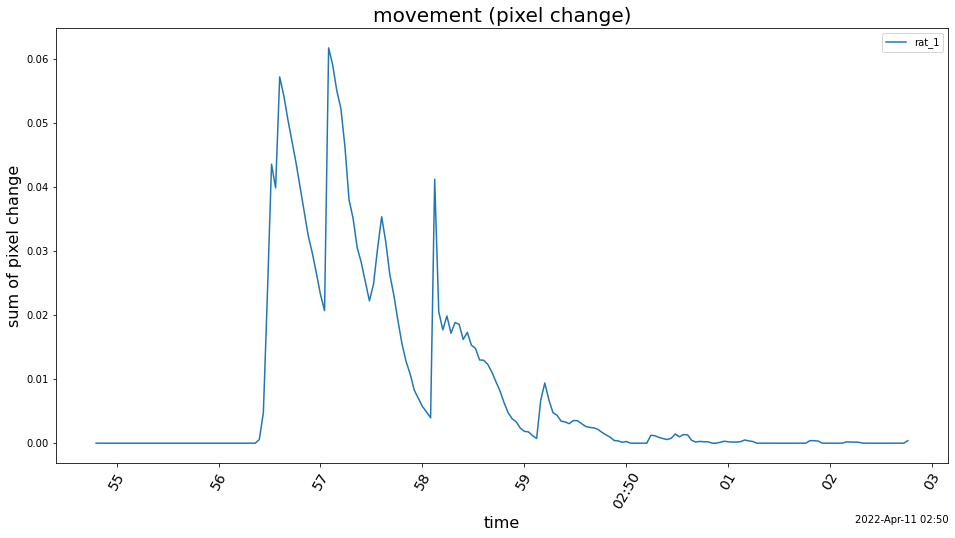

In [43]:
plot_mvm_rescaled(duration_test_copy, mvm_test_copy, f=25, plot_all = False,
                     start={"hours": 2, "minutes": 49, "seconds": 52},
                     dt={"hours": 0, "minutes": 0, "seconds": 8},
                     ylim=1)

                duration
0        0 days 00:00:00
1 0 days 00:00:00.040000
2 0 days 00:00:00.080000
3 0 days 00:00:00.120000
4 0 days 00:00:00.160000


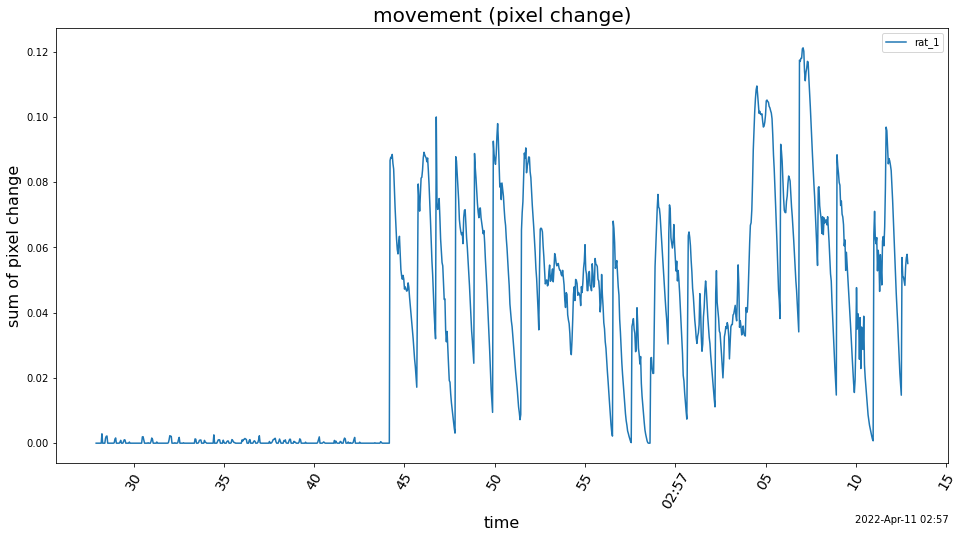

In [46]:
plot_mvm_rescaled(duration_test_copy, mvm_test_copy, f=25, plot_all = False,
                     start={"hours": 2, "minutes": 56, "seconds": 25},
                     dt={"hours": 0, "minutes": 0, "seconds": 45},
                     ylim=1)

# What are the big peaks?

                duration
0        0 days 00:00:00
1 0 days 00:00:00.040000
2 0 days 00:00:00.080000
3 0 days 00:00:00.120000
4 0 days 00:00:00.160000


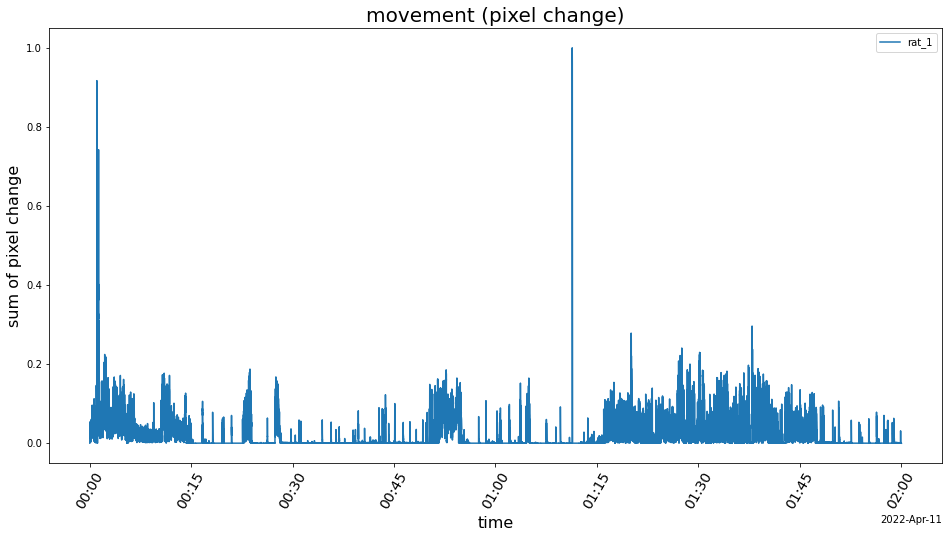

In [47]:
plot_mvm_rescaled(duration_test_copy, mvm_test_copy, f=25, plot_all = False,
                     start={"hours": 0, "minutes": 0, "seconds": 0},
                     dt={"hours": 2, "minutes": 0, "seconds": 0},
                     ylim=1)


                duration
0        0 days 00:00:00
1 0 days 00:00:00.040000
2 0 days 00:00:00.080000
3 0 days 00:00:00.120000
4 0 days 00:00:00.160000


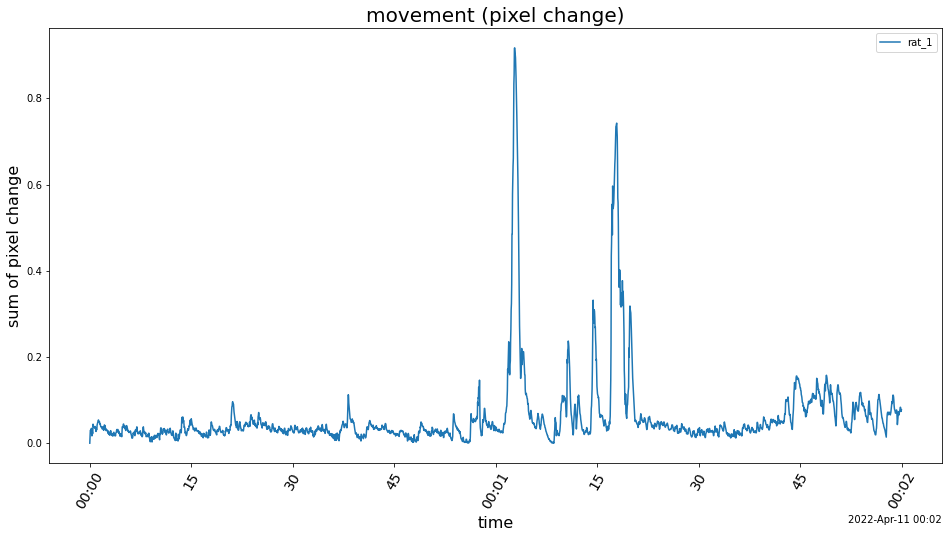

In [48]:
plot_mvm_rescaled(duration_test_copy, mvm_test_copy, f=25, plot_all = False,
                     start={"hours": 0, "minutes": 0, "seconds": 0},
                     dt={"hours": 0, "minutes": 2, "seconds": 0},
                     ylim=1)

                duration
0        0 days 00:00:00
1 0 days 00:00:00.040000
2 0 days 00:00:00.080000
3 0 days 00:00:00.120000
4 0 days 00:00:00.160000


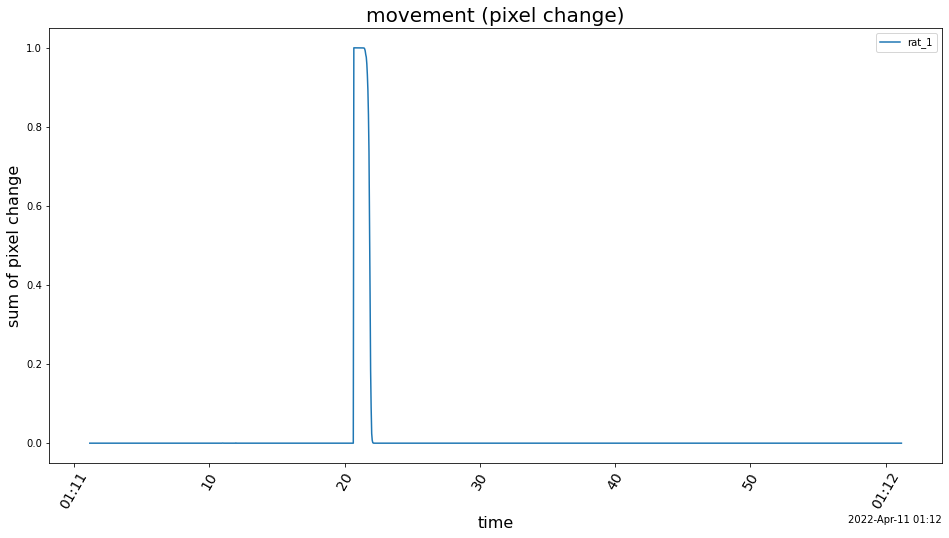

In [50]:
plot_mvm_rescaled(duration_test_copy, mvm_test_copy, f=25, plot_all = False,
                     start={"hours": 1, "minutes": 11, "seconds": 0},
                     dt={"hours": 0, "minutes": 1https://slack.com/signin#/signin, "seconds": 0},
                     ylim=1)

# **MAEVA: 14th of July 2nd session**


## **July 14**


### Determine whether rescaling should also involve cutting the end of video (if ltp ends first)

In [36]:
#path to SYNC_file & mvm file
ephys_time_path="/media/data-119/Rat628-20210714/Rat628-20210714_2tmstp.txt"
mvm_path="/media/data-119/Rat628-20210714/Rat628-20210714_2mvm.txt"
duration_path = "/media/data-119/Rat628-20210714/Rat628-20210714_2duration.txt"

#read SYNC_file
e_test = open(ephys_time_path,"r")
ephys_time_test = [[float(x) for x in line.split()] for line in e_test]
e_test.close()

#read mvm_file
m_test = open(mvm_path,"r")
mvm_test = [[float(x) for x in line.split()] for line in m_test]
m_test.close()

#read duration file (it's in secs)
d_test = open(duration_path,"r")
duration_test = [[float(x) for x in line.split()] for line in d_test]
d_test.close()

#concatenate the list of lists into one list (array)
ephys_time_test = np.concatenate(ephys_time_test)
mvm_test = np.concatenate(mvm_test)
duration_test = np.concatenate(duration_test)

#convert ephys to seconds (divide by sampling freq)
ephys_time_test_sec = [i/2500 for i in ephys_time_test]

In [24]:
len(mvm_test)/len(ephys_time_test_sec)

1.0005173652272397

### Calculate index of lags, number of points between lags

+ it's every 38.5th frame
+ always ~ 0.4 ms = 0.0004 s

+ remove one frame when the lags add up to 40 ms = 0.04 s

-> multiply by factor 100 => 3850

In [40]:
#get the difference between frame in milliseconds
ephys_time_test_sec_diff=np.diff(ephys_time_test_sec)

#sum of diffs => should be the same as duration of video !!
print("Sum of diffs: {}.".format(np.sum(ephys_time_test_sec_diff)))

#get index lags.. time tn-t0
differences_sec=[]
differences_sec_2sum=[]
for i in range(len(ephys_time_test_sec_diff)):
    
    #if the diffed time is not exactly 40 ms
    if ephys_time_test_sec_diff[i]-0.04 != 0:
        #can be negative or positive difference
        differences_sec.append((i,ephys_time_test_sec_diff[i]-0.04))
        differences_sec_2sum.append(ephys_time_test_sec_diff[i]-0.04)

#sum of extra durations per frame (sum off diff !=0.04s - 0.04s)
print("Extra duration of frames in total: {}".format(np.sum(differences_sec_2sum)))
        
#big differences -> from differences select diff of absolute value bigger than 0.0001ms
big_differences_sec=[]
for i in range(len(differences_sec)):
    
    #append tuple if np.abs(difference) > 0.0001
    if np.abs(differences_sec[i][1]) > 0.0001:
        big_differences_sec.append(differences_sec[i])
        
#get the indexes only of big diffs
big_differences_sec_indexes=[big_differences_sec[i][0] for i in range(len(big_differences_sec))]

#np diff of indexes -> after how many frames the difference occur
big_differences_sec_indexes_DIFFS=np.diff(big_differences_sec_indexes)
print(np.mean(big_differences_sec_indexes_DIFFS))

Sum of diffs: 45395.686.
Extra duration of frames in total: 11.926000000000988
38.0509793399517


**The video is longer!!**

### How many frames are to be deleted?

In [13]:
len(mvm_test)/3805.097

298.3319479109205

In [38]:
len(mvm_test)-len(ephys_time_test_sec)

587